# A. Examining stocks of AAPL,GOOG,MSFT,AMZN for 2013-2018

## 1. Importing the Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import glob

## 2. Loading the Data: 

In [2]:
glob.glob(r"C:\Users\AAA\Downloads\S&P_resources\individual_stocks_5yr/*csv")

['C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADP_data.csv',
 'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADSK_data.csv',
 'C:\\Users\

In [3]:
#number of csv files
len(glob.glob(r"C:\Users\AAA\Downloads\S&P_resources\individual_stocks_5yr/*csv"))

505

In [4]:
#analysing stocks of 4 Big Tech companies: Apple, Amazon, Google, Microsoft
company_list = [
    r'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
    r'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
    r'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
    r'C:\\Users\\AAA\\Downloads\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv',
]

In [5]:
all_data = pd.DataFrame()

for file in company_list:
    
    current_df = pd.read_csv(file)
    all_data = pd.concat([current_df, all_data] , ignore_index=True)

## 3. Exploratory Data Analysis:

In [6]:
all_data.shape


(4752, 7)

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 260.0+ KB


In [8]:
all_data.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [9]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [70]:
all_data.head(6)


,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.310,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.500,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.750,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.880,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.870,28.04,32663174,MSFT
5,2013-02-15,28.04,28.16,27.875,28.01,49650538,MSFT


In [11]:
all_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

## 4. Data Cleaning:



In [12]:
all_data.duplicated().sum()

0

In [13]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [14]:
all_data['date'] = pd.to_datetime(all_data['date'])

## 5. Analysing Change in Closing Prices of the stocks overtime:

In [15]:
comp_list = all_data['Name'].unique()

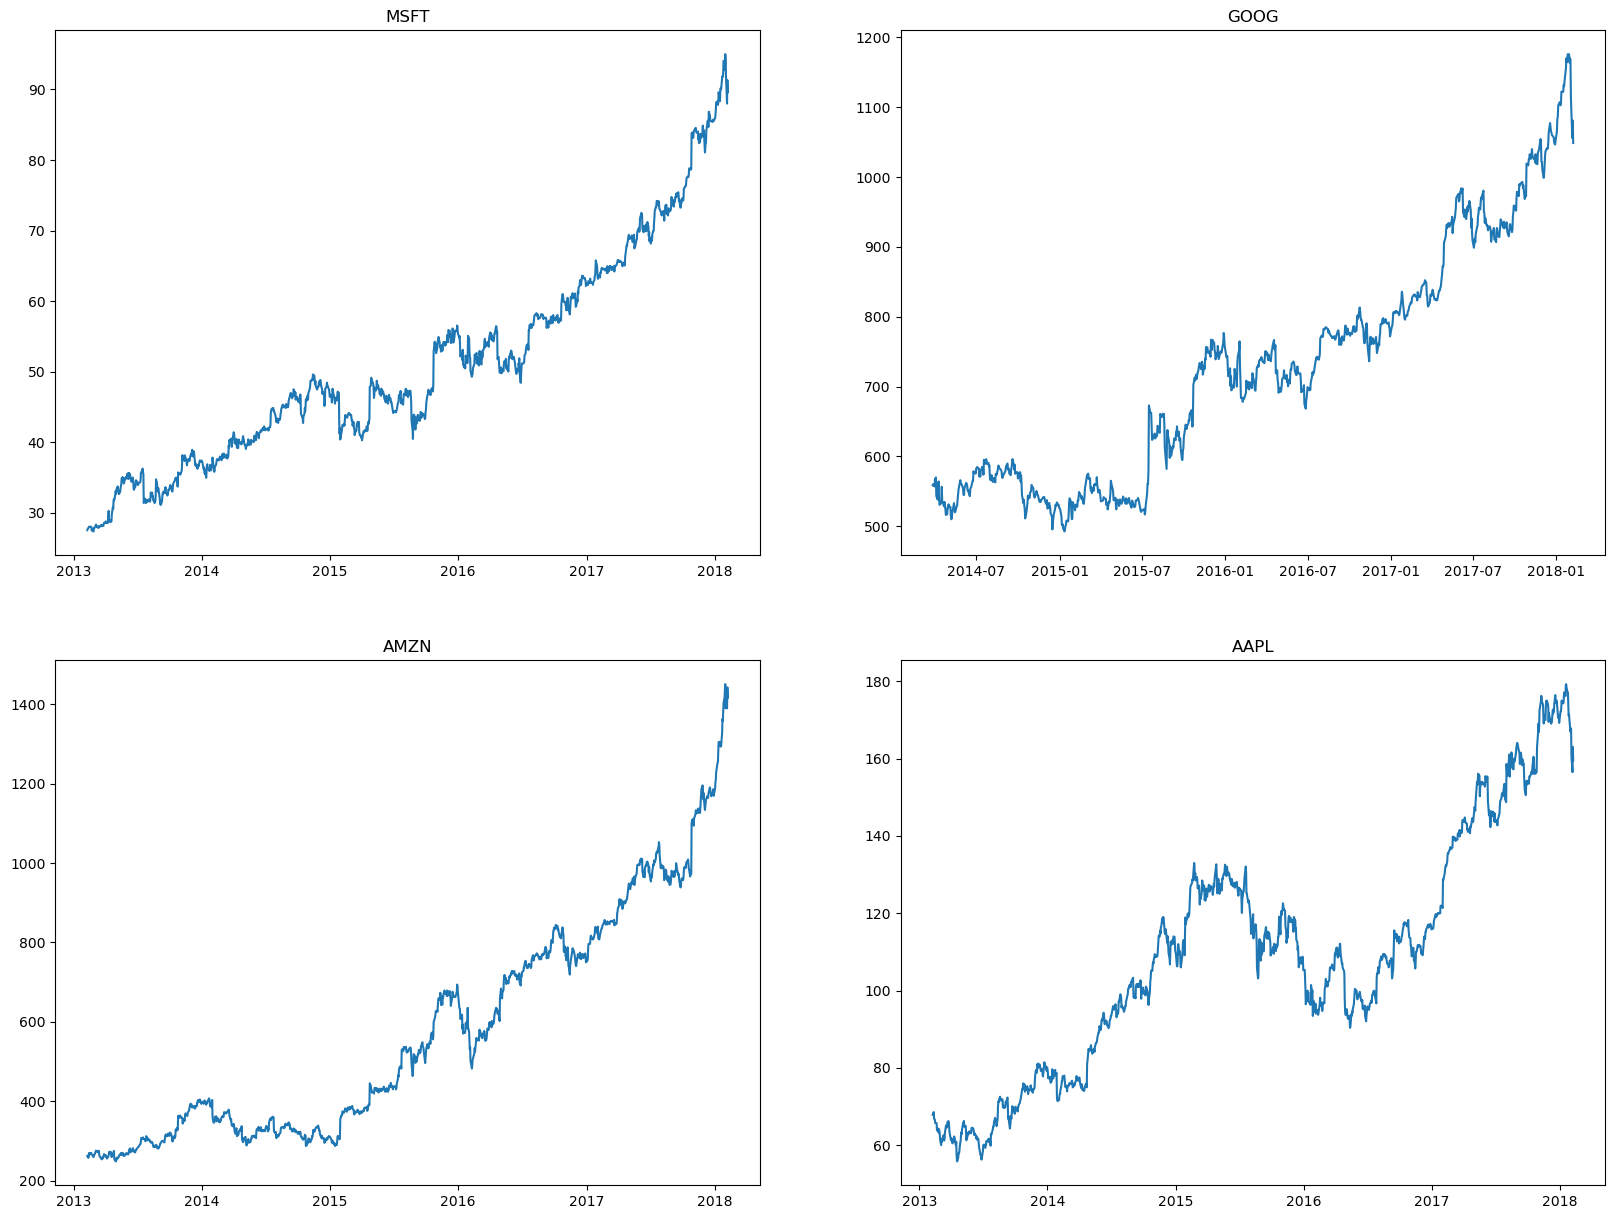

In [16]:
plt.figure(figsize=(20,15))

for index, company in enumerate(comp_list, 1):
    plt.subplot(2,2,index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)
    
    

### Observations:

1. AMZN: had the highest growth of closing price of around 600%
2. MSFT: second highest growth of around 240%
3. AAPL: third highest growth of around 120%
4. GOOG: recorded a comparative slow growth of only 90% overtime

## 6. Analysing Moving Average of the Stocks


Moving Average calculates the average value of a specified number of data points within a defined window or period, and as new data becomes available, the average is recalculated by adding the most recent data point and removing the oldest one within the window.

Shorter-term moving averages (e.g., close 10) respond more quickly to recent price changes, while longer-term moving averages (e.g., close 50) provide a broader perspective of the overall trend.

In [17]:
all_data['close'].rolling(window=10).mean().head(15)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
14    27.7475
Name: close, dtype: float64

In [18]:
new_data = all_data.copy()

In [19]:
window = [10, 20, 50]

for win in window:
    new_data['close_'+ str(win)] = new_data['close'].rolling(win).mean()

In [20]:
new_data.head(25)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,27.3500,27.71,27.310,27.550,33318306,MSFT,NaN,NaN,NaN
1,2013-02-11,27.6500,27.92,27.500,27.860,32247549,MSFT,NaN,NaN,NaN
2,2013-02-12,27.8800,28.00,27.750,27.880,35990829,MSFT,NaN,NaN,NaN
3,2013-02-13,27.9300,28.11,27.880,28.030,41715530,MSFT,NaN,NaN,NaN
4,2013-02-14,27.9200,28.06,27.870,28.040,32663174,MSFT,NaN,NaN,NaN
5,2013-02-15,28.0400,28.16,27.875,28.010,49650538,MSFT,NaN,NaN,NaN
6,2013-02-19,27.8801,28.09,27.800,28.045,38804616,MSFT,NaN,NaN,NaN
7,2013-02-20,28.1300,28.20,27.830,27.870,44109412,MSFT,NaN,NaN,NaN
8,2013-02-21,27.7400,27.74,27.230,27.490,49078338,MSFT,NaN,NaN,NaN
9,2013-02-22,27.6800,27.76,27.480,27.760,31425726,MSFT,27.8535,NaN,NaN


In [21]:
new_data.set_index('date', inplace=True)

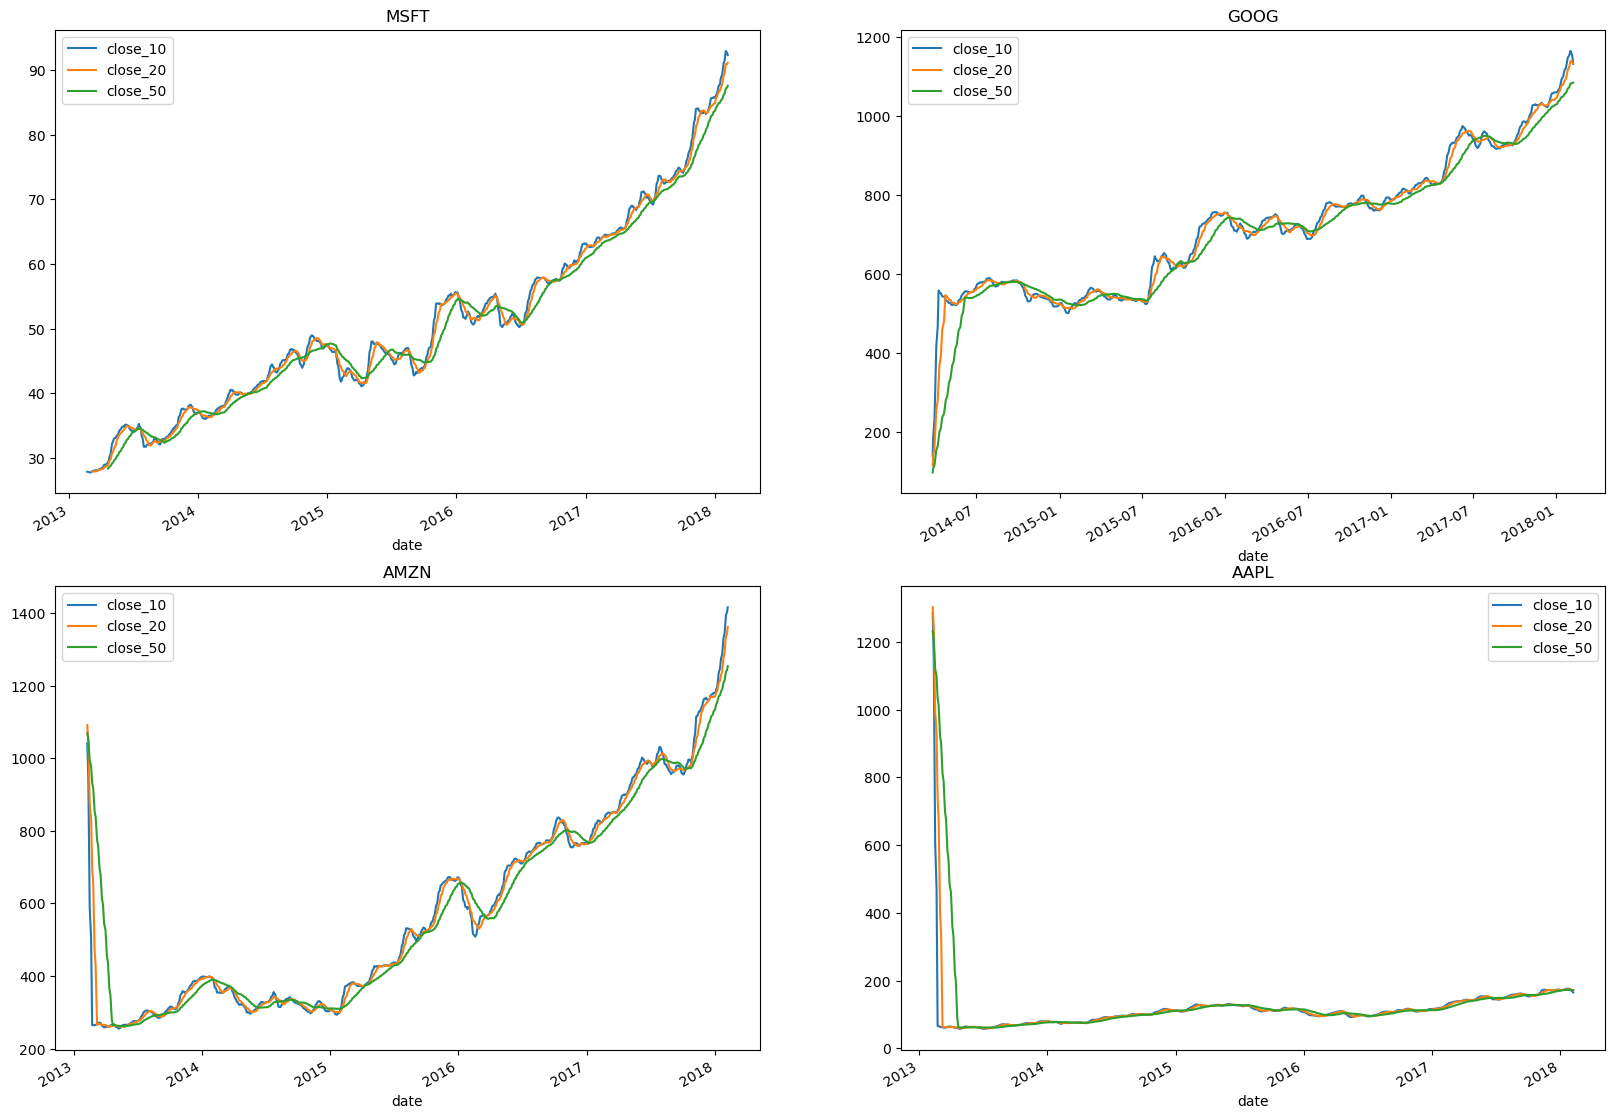

In [22]:
plt.figure(figsize=(20,15))

for index, company in enumerate(comp_list, 1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)
    

### Observations:

1. MSFT, GOOG, AMZN have mostly shown and indicated upward or bullish signal throughout and is as a positive sign for the stock's price direction.
2. The sudden spike in close 50 for AMZN, AAPL reflected the market's reactions to specific event.
3. AAPL signified period of consolidation or a range-bound market where the stock price was oscillating withina narrow range and reflected uncertainty in market.

## 7. Co-Relation Analysis of the closing prices of the companies

In [39]:
company_list

['C:\\\\Users\\\\AAA\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\AAA\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\AAA\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\AAA\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [40]:
company_list[0]

'C:\\\\Users\\\\AAA\\\\Downloads\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [41]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [42]:
closing_price=pd.DataFrame()

In [43]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = app['close']

In [44]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,67.8542
1,68.5614,257.21,559.99,68.5614
2,66.8428,258.70,556.97,66.8428
3,66.7156,269.47,567.16,66.7156
4,66.6556,269.24,567.00,66.6556
...,...,...,...,...
1254,167.7800,1390.00,NaN,167.7800
1255,160.5000,1429.95,NaN,160.5000
1256,156.4900,1390.00,NaN,156.4900
1257,163.0300,1442.84,NaN,163.0300


In [46]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.819078,0.640522,1.000000
amzn_close,0.819078,1.000000,0.888456,0.819078
goog_close,0.640522,0.888456,1.000000,0.640522
msft_close,1.000000,0.819078,0.640522,1.000000


<Axes: >

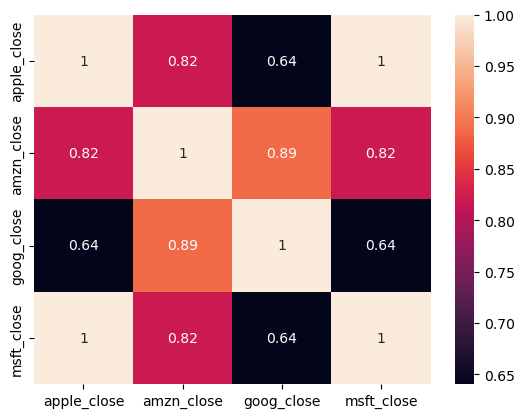

In [47]:
sns.heatmap(closing_price.corr(), annot=True)

### Observation:

1. AMZN and GOOG closing prices have a high correlation compared to other attributing to similar macroeconomic factors.
2. Even MSFT and AAPL have better correlation with AMZN closing prices.

## 8. Examining Daily Change in closing price and Daily Return in Stocks

In [48]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,67.8542
1,68.5614,257.21,559.99,68.5614
2,66.8428,258.70,556.97,66.8428
3,66.7156,269.47,567.16,66.7156
4,66.6556,269.24,567.00,66.6556
...,...,...,...,...
1254,167.7800,1390.00,NaN,167.7800
1255,160.5000,1429.95,NaN,160.5000
1256,156.4900,1390.00,NaN,156.4900
1257,163.0300,1442.84,NaN,163.0300


In [49]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [50]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [51]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) *100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [52]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) *100
    

In [53]:
closing_price

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,67.8542,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,68.5614,1.042235,-1.809506,0.273968,1.042235
2,66.8428,258.70,556.97,66.8428,-2.506658,0.579293,-0.539295,-2.506658
3,66.7156,269.47,567.16,66.7156,-0.190297,4.163123,1.829542,-0.190297
4,66.6556,269.24,567.00,66.6556,-0.089934,-0.085353,-0.028211,-0.089934
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,167.7800,0.209043,-4.196734,NaN,0.209043
1255,160.5000,1429.95,NaN,160.5000,-4.339015,2.874101,NaN,-4.339015
1256,156.4900,1390.00,NaN,156.4900,-2.498442,-2.793804,NaN,-2.498442
1257,163.0300,1442.84,NaN,163.0300,4.179181,3.801439,NaN,4.179181


In [54]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [55]:
closing_p =closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

In [56]:
closing_p

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.042235
2,-2.506658,0.579293,-0.539295,-2.506658
3,-0.190297,4.163123,1.829542,-0.190297
4,-0.089934,-0.085353,-0.028211,-0.089934
...,...,...,...,...
1254,0.209043,-4.196734,NaN,0.209043
1255,-4.339015,2.874101,NaN,-4.339015
1256,-2.498442,-2.793804,NaN,-2.498442
1257,4.179181,3.801439,NaN,4.179181


In [75]:
closing_p.corr().round(2)

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.00,0.29,0.04,1.00
amzn_close_pct_change,0.29,1.00,0.03,0.29
goog_close_pct_change,0.04,0.03,1.00,0.04
msft_close_pct_change,1.00,0.29,0.04,1.00


<Axes: >

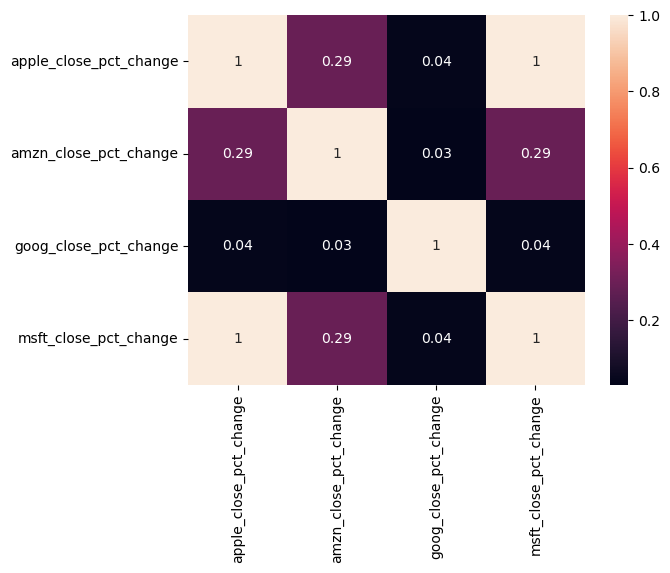

In [76]:
sns.heatmap(closing_p.corr().round(2), annot=True)

### Observation:

1. Very sparse correlation.

# B. Examining Stocks of AAPL,GOOG,MSFT,NTFLX for 2023

In [68]:
stocks_data = pd.read_csv(r'C:\Users\AAA\Desktop/stocks.csv')
stocks_data.head(10)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
6,AAPL,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65573800
7,AAPL,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
8,AAPL,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59144100
9,AAPL,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200


In [61]:
# Descriptive Statistics for each stock
descriptive_stats = stocks_data.groupby('Ticker')['Close'].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


## 1. Time Series Analysis

In [62]:
# Time Series Analysis
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])
pivot_data = stocks_data.pivot(index='Date', columns='Ticker', values='Close')

# Create a subplot
fig = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Time Series of Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    legend_title='Ticker',
    showlegend=True
)

# Show the plot
fig.show()

### Observations: 

1. AAPL and MSFT exhibit a general upward trend in this period.
2. NFLX shows more pronounced fluctuations compared to others.
3. When comparing the stocks, MSFT and NFLX generally trade at higher price levels than AAPL and GOOG

## 2. Volatility Analysis

In [63]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')

# Show the figure
fig.show()

### Observations:

1. NFLX: Highest volatility with a standard deviation of approximately 18.55.
2. MSFT: Next highest, with a standard deviation of around 17.68.
3. AAPL: Lower volatility compared to NFLX and MSFT, with a standard deviation of about 7.36.
4. GOOG: The least volatile in this set, with a standard deviation of approximately 6.28.


## 3. Correlation Analysis

In [64]:
# Correlation Analysis
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

# Show the figure
fig.show()


### Observations:

1. AAPL and MSFT seem to have a relatively higher positive correlation.

## 4. Comparative Analysis

In [65]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(percentage_change,
             x=percentage_change.index,
             y=percentage_change.values,
             labels={'y': 'Percentage Change (%%)', 'x': 'Ticker'},
             title='Percentage Change in Closing Prices')

# Show the plot
fig.show()

### Observations:

1. MSFT: The highest positive change of approximately 16.10%.
2. AAPL: Exhibited a positive change of approximately 12.23%. It indicates a solid performance, though slightly lower than MSFT’s.
3. GOOG: Showed a slight negative change of about -1.69%. It indicates a minor decline in its stock price over the observed period.
4. NFLX: Experienced the most significant negative change, at approximately -11.07%. It suggests a notable decrease in its stock price during the period.

## 5. Daily Return vs Risk Analysis

In [66]:
daily_returns = pivot_data.pct_change().dropna()

# Recalculating average daily return and standard deviation (risk)
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

# Creating a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()

### Observations:

1. AAPL shows the lowest risk combined with a positive average daily return, suggesting a more stable investment.
2. GOOG has higher volatility than AAPL and, on average, a slightly negative daily return, indicating a riskier investment.
3. MSFT shows moderate risk with the highest average daily return, suggesting a potentially more rewarding investment, although with higher volatility compared to AAPL.
4. NFLX exhibits the highest risk and a negative average daily return.